In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load sample file
df = pd.read_csv('/content/drive/MyDrive/AMZN_historical_data.csv')

# Parse dates and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Display structure
print(df.head())


        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
!pip install numpy==1.24.4 --force-reinstall


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, 

In [1]:
!pip install pandas_ta


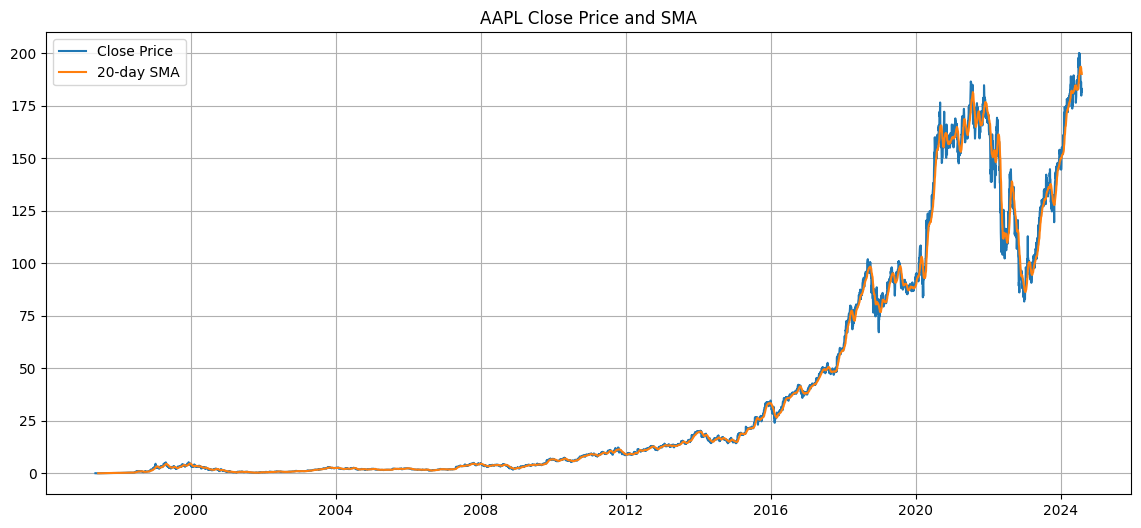

In [3]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/content/drive/MyDrive/AMZN_historical_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate indicators
df['SMA_20'] = ta.sma(df['Close'], length=20)
df['RSI_14'] = ta.rsi(df['Close'], length=14)
macd = ta.macd(df['Close'])
df = pd.concat([df, macd], axis=1)

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_20'], label='20-day SMA')
plt.title('AAPL Close Price and SMA')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas_ta as ta

# Calculate indicators using pandas_ta
df['SMA_20'] = ta.sma(df['Close'], length=20)
df['RSI_14'] = ta.rsi(df['Close'], length=14)
macd = ta.macd(df['Close'])
df = pd.concat([df, macd], axis=1)


In [10]:
!pip install yfinance


In [11]:
import yfinance as yf

# Download historical data
amzn = yf.download("AMZN", start="2023-01-01", end="2024-12-31")

# Display
print(amzn.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                            
2023-01-03  85.820000  86.959999  84.209999  85.459999  76706000
2023-01-04  85.139999  86.980003  83.360001  86.550003  68885100
2023-01-05  83.120003  85.419998  83.070000  85.330002  67930800
2023-01-06  86.080002  86.400002  81.430000  83.029999  83303400
2023-01-09  87.360001  89.480003  87.080002  87.459999  65266100


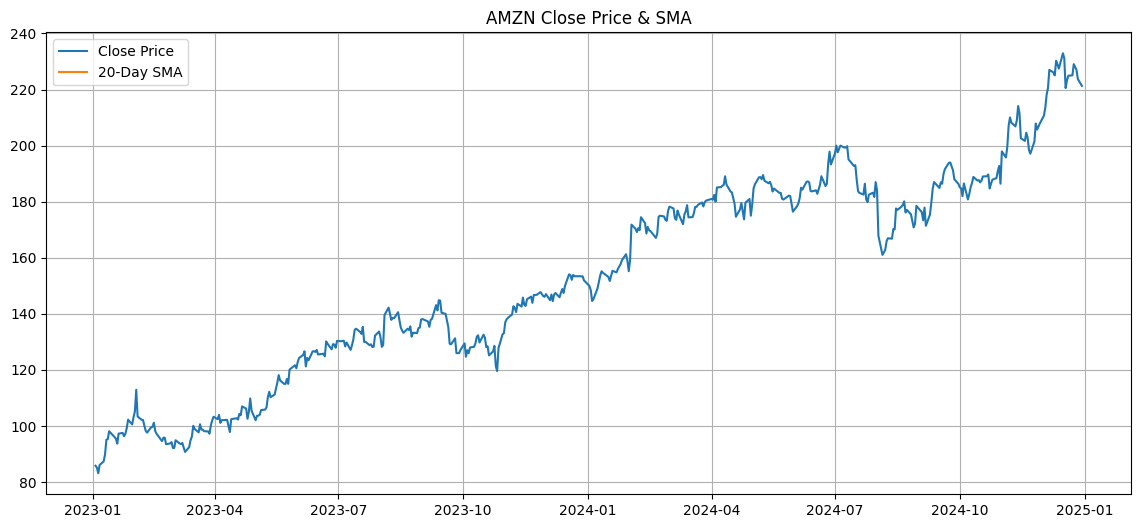

In [12]:
import pandas_ta as ta

# Calculate technical indicators
amzn['SMA_20'] = ta.sma(amzn['Close'], length=20)
amzn['RSI_14'] = ta.rsi(amzn['Close'], length=14)
macd = ta.macd(amzn['Close'])
amzn = pd.concat([amzn, macd], axis=1)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(amzn.index, amzn['Close'], label='Close Price')
plt.plot(amzn.index, amzn['SMA_20'], label='20-Day SMA')
plt.title('AMZN Close Price & SMA')
plt.legend()
plt.grid(True)
plt.show()


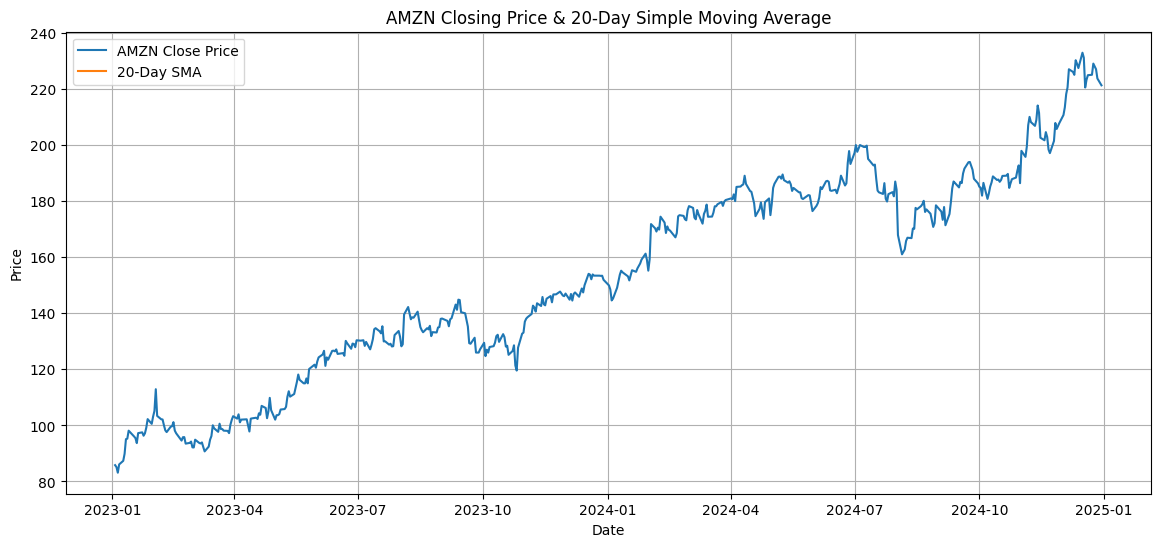

In [14]:
import matplotlib.pyplot as plt

# Closing price + 20-day SMA (from pandas_ta)
plt.figure(figsize=(14, 6))
plt.plot(amzn.index, amzn['Close'], label='AMZN Close Price')
plt.plot(amzn.index, amzn['SMA_20'], label='20-Day SMA')
plt.title('AMZN Closing Price & 20-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
